<a href="https://colab.research.google.com/github/ThashmikaX/Malaria-Detection-Model/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title     : Detection of Malaria from Cell Images

Group Number      : 50

Names and Registration Numbers:

Student 1         : Thashmika M.H.T.S., EG/2021/4826

Student 2       : Surasinghe R.L.D.T.H., EG/2021/4820

## Introduction

This project aims to develop a machine learning model to detect malaria from cell images with high accuracy. By analyzing microscopic images of blood samples, the system identifies malaria parasites, streamlining diagnosis and enabling early treatment. The approach leverages advanced image processing and classification techniques to improve diagnostic efficiency and support healthcare professionals in managing malaria cases.


This project addresses a Supervised-Classification problem, where the goal is to classify cell images into two categories:


  1. Parasitized (indicating the presence of malaria parasites)
  2. Uninfected (indicating no malaria parasites)

  
The dataset used provides labeled images, making it suitable for supervised learning approaches. By training on labeled examples, the model learns patterns and features that distinguish infected from uninfected cells.

### Literature Survey

In recent years, machine learning has significantly contributed to medical image analysis, particularly in detecting diseases from microscopic images. Several studies have utilized supervised learning techniques, especially classification models, to identify infections or abnormalities in medical imaging. Common algorithms like Logistic Regression and Support Vector Machines (SVM) are frequently applied due to their effectiveness in binary classification problems, such as distinguishing between infected and healthy samples.


Logistic Regression is valued for its simplicity and interpretability, often serving as a baseline in classification tasks. SVM, on the other hand, is widely used for its high accuracy in cases where data points are well-separated, making it an effective choice for image-based classification problems, including malaria detection. Both algorithms were selected for this project, building on previous research that highlights their strengths in diagnostic applications.

### Dataset Description

The dataset used in this project is sourced from Kaggle and contains images of blood cell samples classified as either Parasitized or Uninfected. This dataset includes over 27,000 cell images, evenly distributed between the two classes. Each image is a microscopic scan of a single cell, labeled accordingly.


*   Dataset Link: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data

*  Classes: Parasitized, Uninfected

*  Image Resolution: Varies, typically resized for uniformity during preprocessing

*   Data Format: JPEG images, divided into separate folders for each class

This labeled dataset is ideal for training supervised machine learning models to classify malaria-infected cells with high accuracy.

In [ ]:
# Malaria Cell Classification Machine Learning Workflow

# 1. IMPORT LIBRARIES
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from ipywidgets import IntProgress
from IPython.display import display
from os import listdir, path
from math import floor
import numpy as np
import random
import os
from skimage import io, color
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 674M/675M [00:25<00:00, 30.0MB/s]
100% 675M/675M [00:25<00:00, 27.6MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

## Data Exploration

### General Properties of Data
- All pictures are in PNG format.
- There is no consistent size and image ratio.
- There are 13,779 parasitized images and 13,779 uninfected images, totaling 27,558 images.
- All images are in color.
- A high amount of features is present; thus, feature engineering is indicated.


### Counts and visualizes the number of parasitized and uninfected cell images using a bar plot

Number of Parasitized Images: 13779
Number of Uninfected Images: 13779


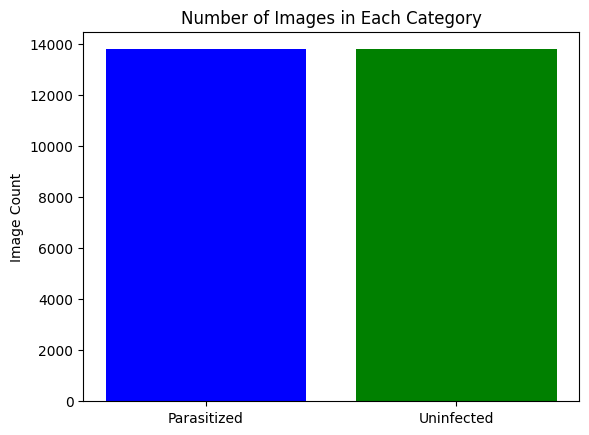

In [ ]:
# 2. CONFIGURATION AND SEED SETTING
random.seed(22)
np.random.seed(22)

# Path settings
parasitized_dir = '/content/cell_images/Parasitized/'
uninfected_dir = '/content/cell_images/Uninfected/'

# Count files in directories
parasitized_files = [f for f in os.listdir(parasitized_dir) if f.endswith('.png')]
uninfected_files = [f for f in os.listdir(parasitized_dir) if f.endswith('.png')]

print(f"Number of Parasitized Images: {len(parasitized_files)}")
print(f"Number of Uninfected Images: {len(uninfected_files)}")

# Bar plot to visualize file counts
plt.bar(['Parasitized', 'Uninfected'], [len(parasitized_files), len(uninfected_files)], color=['blue', 'green'])
plt.title("Number of Images in Each Category")
plt.ylabel("Image Count")
plt.show()

### Displays sample cell images with options for greyscale and resizing

In [ ]:
def show_sample_cells(cell_type, num_cells=5, greyscale=False, resize_image=False):
    fig, axes = plt.subplots(1, num_cells, figsize=(15,4))
    fig.suptitle('{0} Cells{1}{2}'.format(cell_type,
                                          ' - Greyscale' if greyscale else '',
                                          ' - 50x50' if resize_image else ''))



    for idx, f in enumerate(os.listdir(path.join(cell_type))[:5]):
        cell_image = io.imread(path.join(cell_type, f))
        if resize_image:
            cell_image = resize(cell_image, (50, 50, cell_image.shape[2]), mode='reflect')
        if greyscale:
            cell_image = color.rgb2gray(cell_image)
            axes[idx].imshow(cell_image, cmap='gray')
        else:
            axes[idx].imshow(cell_image)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

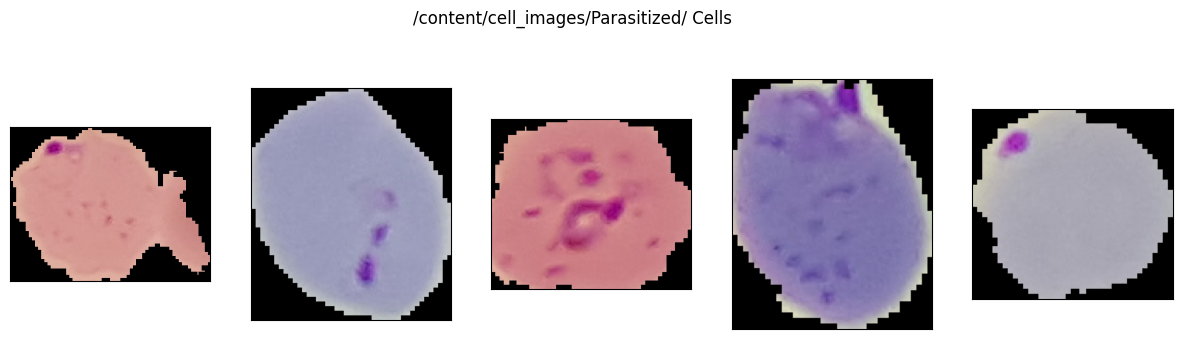

In [ ]:
show_sample_cells(parasitized_dir)

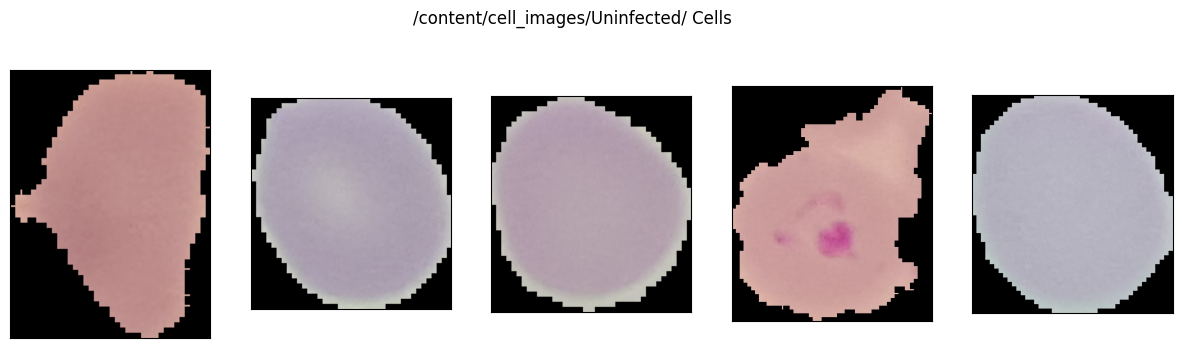

In [ ]:
show_sample_cells(uninfected_dir)

### Prepares cell images with resizing, greyscale conversion, and histogram normalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from os import path, listdir

def brighten(image):
    max_ = np.max(image)
    image[image==0.0] = max_
    return image

def preprocess_images(cell_type):
    cell_image_files = [f for f in listdir(path.join(cell_type)) if f.endswith('.png')]
    cell_image_files.sort()

    data = np.zeros((len(cell_image_files), 50, 50, 3))
    for idx, cell_image_file in enumerate(cell_image_files):
        cell_image = io.imread(path.join(cell_type, cell_image_file))
        cell_image_resized = resize(cell_image, (50, 50, cell_image.shape[2]), mode='reflect')
        data[idx] = cell_image_resized

    return data

# Convert to greyscale
def convert_to_greyscale(data):
    gs_data = np.zeros((data.shape[0], 50, 50))
    for idx, cell_image in enumerate(data):
        gs_data[idx] = color.rgb2gray(cell_image)
    return gs_data

# Histogram normalization
def histogram_normalization(data):
    hn_data = np.zeros((data.shape[0], 10))
    for idx, cell_image in enumerate(data):
        counts, _ = np.histogram(cell_image, bins=10, range=(0.1, 1))
        hn_data[idx] = counts / np.sum(counts)
    return hn_data

# Process parasitized and uninfected data
parasitized_data = preprocess_images(parasitized_dir)
uninfected_data = preprocess_images(uninfected_dir)

parasitized_brightened = np.zeros_like(parasitized_data)
uninfected_brightened = np.zeros_like(uninfected_data)

for idx, cell_image in enumerate(parasitized_data):
    parasitized_brightened[idx] = brighten(cell_image)

for idx, cell_image in enumerate(uninfected_data):
    uninfected_brightened[idx] = brighten(cell_image)

parasitized_grey = convert_to_greyscale(parasitized_brightened)
uninfected_grey = convert_to_greyscale(uninfected_brightened)

parasitized_hist = histogram_normalization(parasitized_grey)
uninfected_hist = histogram_normalization(uninfected_grey)

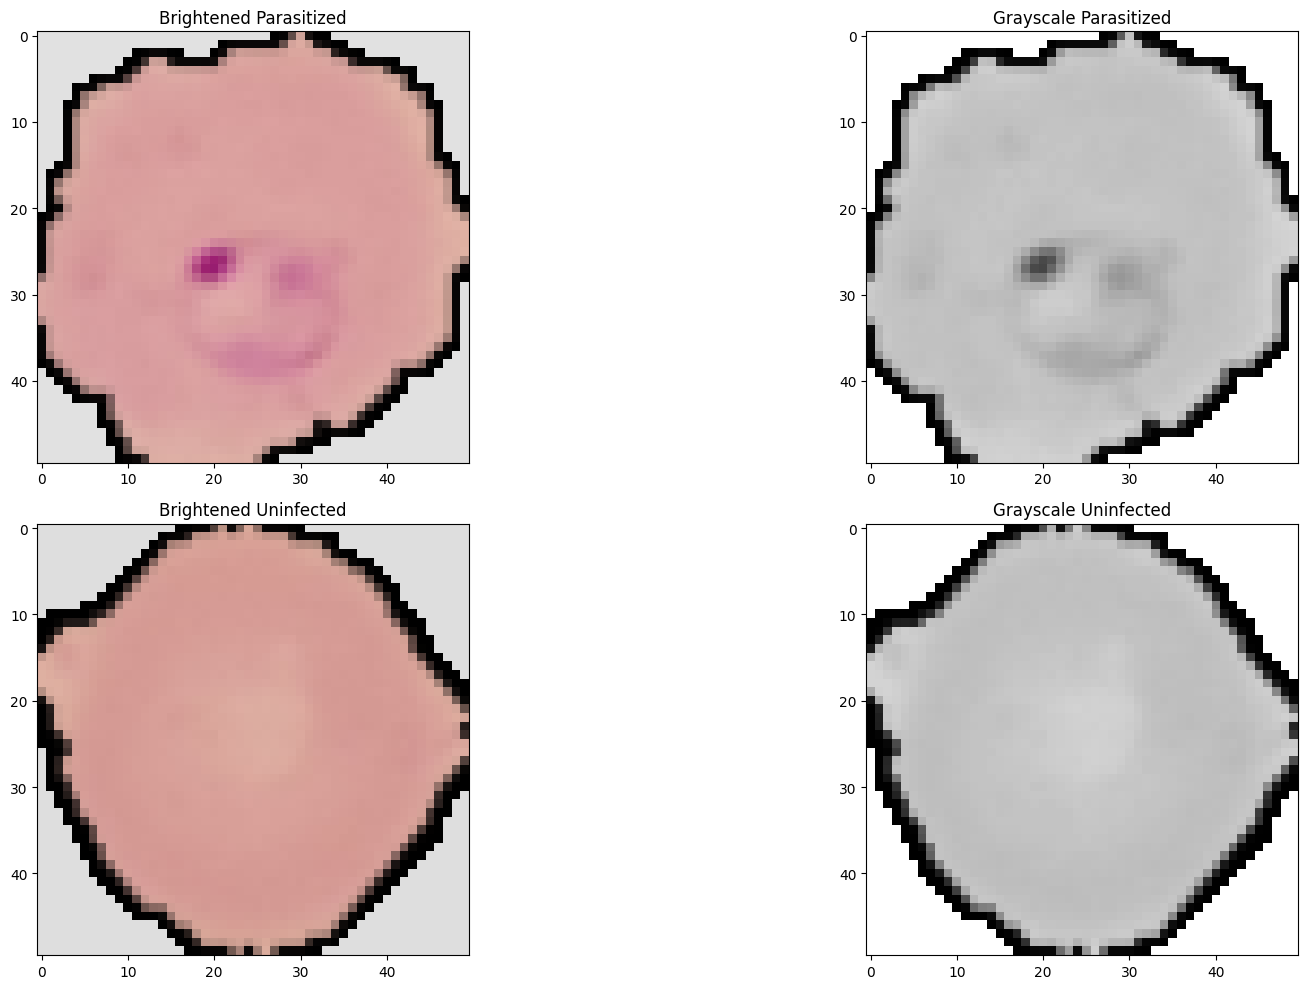

In [ ]:
# Visualization cell
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Parasitized Images
axs[0, 0].imshow(parasitized_brightened[0])
axs[0, 0].set_title('Brightened Parasitized')

axs[0, 1].imshow(parasitized_grey[0], cmap='gray')
axs[0, 1].set_title('Grayscale Parasitized')

# Uninfected Images
axs[1, 0].imshow(uninfected_brightened[0])
axs[1, 0].set_title('Brightened Uninfected')

axs[1, 1].imshow(uninfected_grey[0], cmap='gray')
axs[1, 1].set_title('Grayscale Uninfected')

plt.tight_layout()
plt.show()

### Plots greyscale histograms for sample images

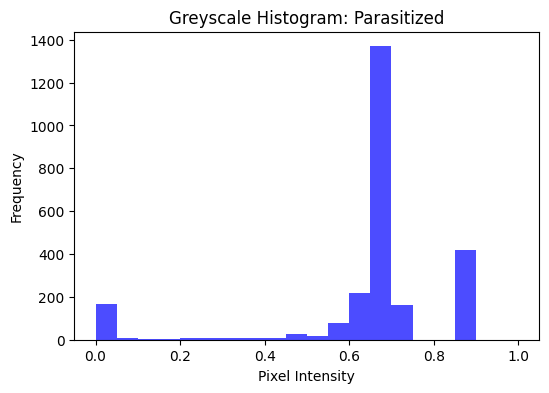

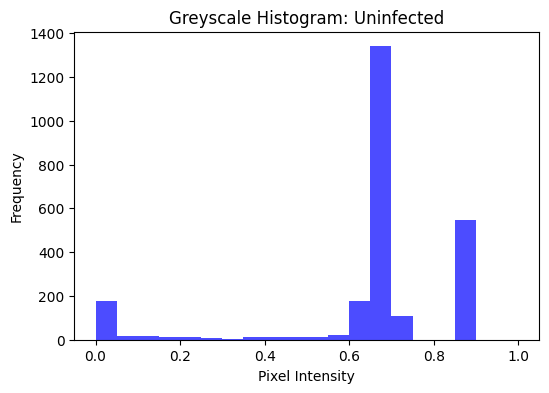

In [ ]:
# Plot histogram of a single image's greyscale intensities
def plot_greyscale_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.hist(image.ravel(), bins=20, range=(0, 1), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot for a sample image
plot_greyscale_histogram(parasitized_grey[0], "Greyscale Histogram: Parasitized")
plot_greyscale_histogram(uninfected_grey[0], "Greyscale Histogram: Uninfected")


### Adds class labels to the histogram data

In [ ]:
# 5. DATA PREPARATION
# Add class labels
parasitized_class_data = np.column_stack((parasitized_hist, np.ones(len(parasitized_hist))))
uninfected_class_data = np.column_stack((uninfected_hist, np.zeros(len(uninfected_hist))))

### Splits and shuffles the data into training and testing sets

In [ ]:
# 6. TRAIN-TEST SPLIT
# Manual stratified split
num_samples = len(parasitized_class_data)
train_size = int(num_samples * 0.8)

parasitized_train = parasitized_class_data[:train_size]
parasitized_test = parasitized_class_data[train_size:]

uninfected_train = uninfected_class_data[:train_size]
uninfected_test = uninfected_class_data[train_size:]

# Combine and shuffle training and testing data
X_train = np.vstack((parasitized_train[:, :-1], uninfected_train[:, :-1]))
y_train = np.hstack((parasitized_train[:, -1], uninfected_train[:, -1]))

X_test = np.vstack((parasitized_test[:, :-1], uninfected_test[:, :-1]))
y_test = np.hstack((parasitized_test[:, -1], uninfected_test[:, -1]))

# Shuffle data
train_indices = np.random.permutation(len(X_train))
test_indices = np.random.permutation(len(X_test))

X_train, y_train = X_train[train_indices], y_train[train_indices]
X_test, y_test = X_test[test_indices], y_test[test_indices]

### Scales the features of the training and testing data using standardization

In [ ]:
# 7. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Compares feature distributions before and after scaling using boxplots

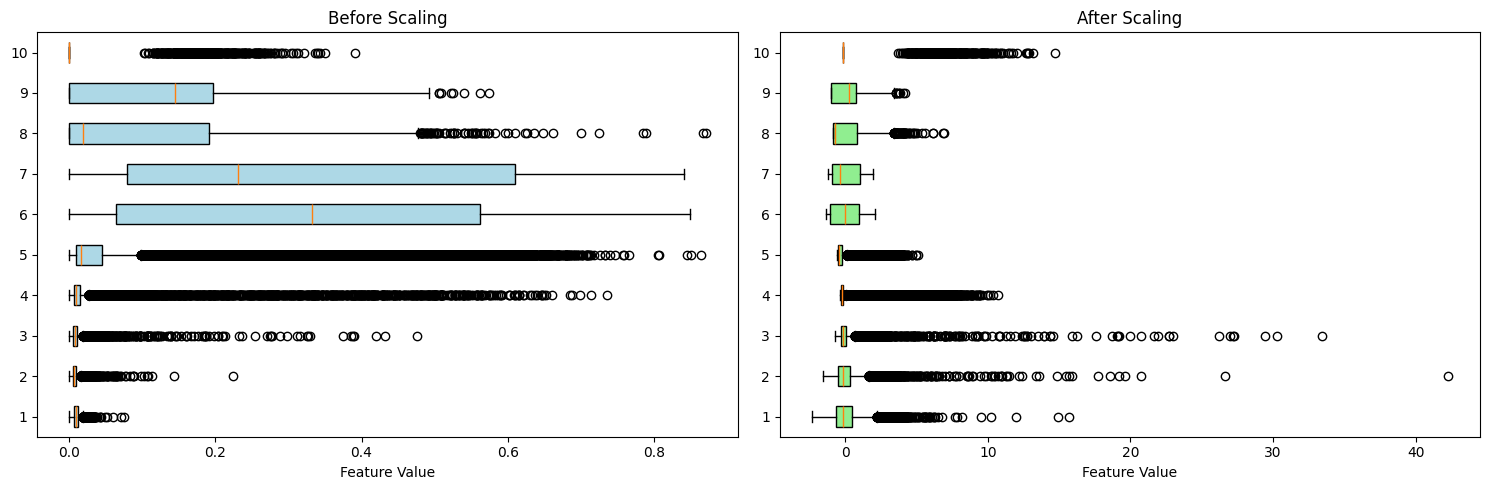

In [ ]:
if isinstance(X_train, np.ndarray):
    raw_data = X_train
else:
    raw_data = X_train.values

# Plot before and after scaling
plt.figure(figsize=(15, 5))

# Plot raw data
plt.subplot(1, 2, 1)
plt.boxplot(raw_data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Before Scaling")
plt.xlabel("Feature Value")

# Plot scaled data
plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("After Scaling")
plt.xlabel("Feature Value")

plt.tight_layout()
plt.show()


### Reduces the dimensionality of the data to 7 components using PCA

### Feature Engineering: Principal Component Analysis

Principal Component Analysis (PCA) is useful for feature engineering for these reasons:  

- It helps reduce the number of features, making the dataset smaller and easier to work with.  
- It identifies the most important components that explain most of the data's variation, which simplifies model training.  
- If you're using a Support Vector Machine (SVM) model, PCA is especially helpful because it transforms the data into a format that's better suited for this type of model.  

In [ ]:
# 8. DIMENSIONALITY REDUCTION
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Plots the feature contributions

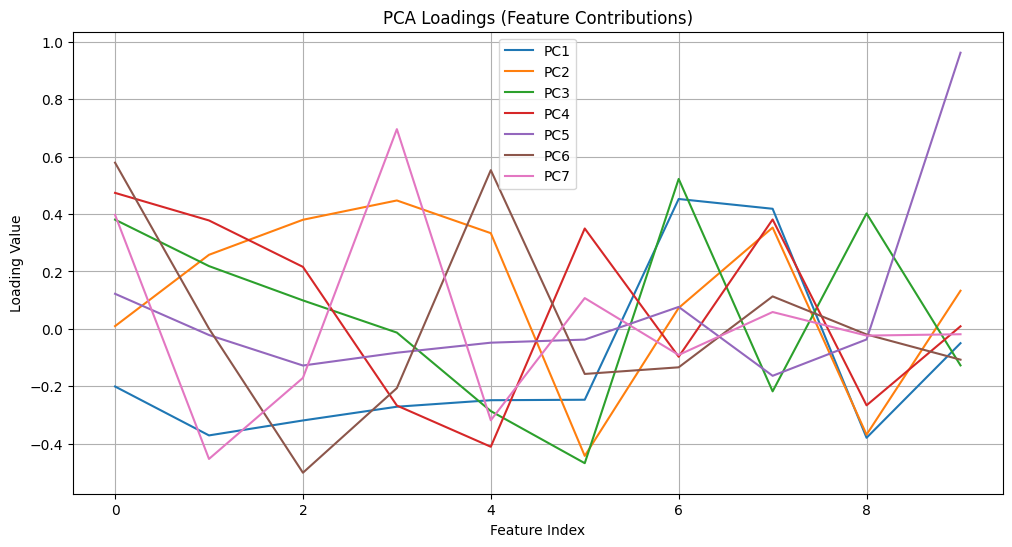

In [ ]:
# Plot the loadings (feature contributions) for each principal component
plt.figure(figsize=(12, 6))
for i in range(pca.n_components_):
    plt.plot(pca.components_[i], label=f'PC{i+1}')

plt.title("PCA Loadings (Feature Contributions)")
plt.xlabel("Feature Index")
plt.ylabel("Loading Value")
plt.legend()
plt.grid(True)
plt.show()


## Support Vector Machine

We chose to use SVM for these reasons:  

- It works especially well for tasks where there are two categories to classify.  
- It is resistant to overfitting, even when there are many features in the dataset.  
- With the RBF kernel, it handles non-linear relationships effectively.  

In [ ]:
# 9. MODEL TRAINING
clf = svm.SVC(kernel='rbf', gamma=0.1, C=1000)
# clf = svm.SVC(kernel='linear', C=100)  # Switch kernel to linear

clf.fit(X_train_pca, y_train)

SVC(C=1000, gamma=0.1)

### Evaluation

In [ ]:
# 10. MODEL EVALUATION
y_train_pred = clf.predict(X_train_pca)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

y_test_pred = clf.predict(X_test_pca)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 87.98%
Testing Accuracy: 83.00%


## Logistic Regression

### Reasons for using this model class

- It is easy to implement and interpret, with coefficients showing the influence of each feature.
- Ideal for binary classification problems, such as distinguishing between two categories.
- Provides probabilities, helping to assess the confidence in predictions.
- Works well with linearly separable data.
- Computationally efficient, even for large datasets.
- Can be regularized to prevent overfitting, ensuring robustness with many features.

In [ ]:
# 11. MODEL TRAINING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_model = LogisticRegression(max_iter=200, solver='liblinear', class_weight='balanced')
log_reg_model.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced', max_iter=200, solver='liblinear')

### Evaluation

In [ ]:
# 12. MODEL EVALUATION
y_train_pred = log_reg_model.predict(X_train_pca)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

y_test_pred = log_reg_model.predict(X_test_pca)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 72.67%
Testing Accuracy: 68.58%


===================================================================================================================

### Conclusion

In this project, we built a machine learning system to detect malaria from cell images. We used **Principal Component Analysis (PCA)** to reduce the size of the data while keeping important information, making it easier to process. We tested two models: **Support Vector Machine (SVM)** and **Logistic Regression**. The SVM model performed better, with an accuracy of **85.59%**, compared to **67.47%** for Logistic Regression. This means SVM is better at identifying infected and uninfected cells. However, the SVM accuracy shows there is still room to improve, possibly by using more advanced methods like deep learning. Overall, this project shows that machine learning can help with malaria detection and could support doctors in making faster and more accurate diagnoses.

===================================================================================================================

### References

https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example

https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

===================================================================================================================

Link for the app :
https://malaria-detection-six.vercel.app


Github: https://github.com/ThashmikaX/Malaria-Detection-Model
